### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:
df = pd.read_csv("Life_Expectancy.csv")
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

In [4]:
cols = df.columns
cols = [col.strip() for col in cols]
df.columns = cols         #removing spaces|

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

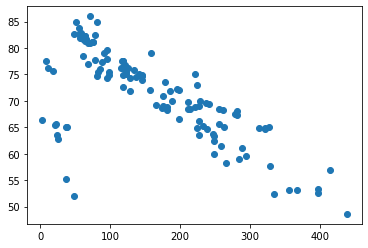

In [6]:
plt.scatter(df['Adult_Mortality'],df['Expected'])
plt.show()

In [7]:
x = df[['Adult_Mortality']]
y = df['Expected']

In [8]:
xc = sm.add_constant(x)

In [9]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.27e-20
Time:                        15:29:15   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [11]:
y = df['Expected']
x = df['Income_Index']

In [12]:
xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.13e-34
Time:                        15:29:15   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#we should calculate mean of the error

In [14]:
y_pred = model.predict(xc)
mean_error = np.sum((y-y_pred)**2)/len(y)
mean_error

20.56116776979111

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [16]:
y = df['Expected']
x = df[['Polio','Hepatitis','Diphtheria']]

In [17]:
xc = sm.add_constant(x)

In [18]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           0.000468
Time:                        15:29:15   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.000      51.010      64.966
Polio          0.0910      0.043      2.099      0.038       0.005       0.177
Hepatitis     -0.1037      0.068     -1.528      0.129      -0.238       0.031
Diphtheria     0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y = df['Expected']
x = df[['Hepatitis','Diphtheria']]

In [20]:
xc = sm.add_constant(x)

In [21]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     7.187
Date:                Tue, 06 Sep 2022   Prob (F-statistic):            0.00112
Time:                        15:29:15   Log-Likelihood:                -433.39
No. Observations:                 124   AIC:                             872.8
Df Residuals:                     121   BIC:                             881.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0765      3.428     17.523      0.000      53.289      66.864
Hepatitis     -0.1126      0.069     -1.640      0.104      -0.249       0.023
Diphtheria     0.2358      0.075      3.150      0.002       0.088       0.384
==============================================================================
Omnibus:                        4.871   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.353
Skew:                          -0.381   Prob(JB):                        0.113
Kurtosis:                       2.487   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y = df['Expected']
x = df[['Hepatitis']]
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.147
Date:                Tue, 06 Sep 2022   Prob (F-statistic):             0.0439
Time:                        15:29:15   Log-Likelihood:                -438.27
No. Observations:                 124   AIC:                             880.5
Df Residuals:                     122   BIC:                             886.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.9510      3.169     20.494      0.000      58.677      71.225
Hepatitis      0.0737      0.036      2.036      0.044       0.002       0.145
==============================================================================
Omnibus:                        4.162   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                4.102
Skew:                          -0.402   Prob(JB):                        0.129
Kurtosis:                       2.615   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [24]:
df['Status'].value_counts()

Developing    105
Developed      19
Name: Status, dtype: int64

In [25]:
df2 = pd.get_dummies(df,columns=['Status'],drop_first=True)

In [26]:
df2.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Status_Developing
0,Afghanistan,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0,1
1,Albania,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5,1
2,Algeria,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6,1
3,Angola,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4,1
4,Argentina,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3,1


In [27]:
y = df['Expected']
x = df2[['Hepatitis','Polio','Diphtheria','Status_Developing']]
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.00e-09
Time:                        15:29:15   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
Status_Developing   -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y = df['Expected']
x = df2[['Polio','Status_Developing']]
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     27.90
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.09e-10
Time:                        15:29:15   Log-Likelihood:                -416.83
No. Observations:                 124   AIC:                             839.7
Df Residuals:                     121   BIC:                             848.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.6009      3.256     21.988      0.000      65.154      78.048
Polio                 0.1008      0.030      3.382      0.001       0.042       0.160
Status_Developing   -10.7587      1.784     -6.030      0.000     -14.291      -7.227
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.859
Skew:                          -0.372   Prob(JB):                        0.239
Kurtosis:                       3.024   Cond. No.                         487.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#people in developing countries leave less than 10+years when compared to people in developed countries

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            124 non-null    object 
 1   Adult_Mortality    124 non-null    int64  
 2   Infant_Deaths      124 non-null    int64  
 3   Hepatitis          124 non-null    int64  
 4   Measles            124 non-null    int64  
 5   BMI                124 non-null    float64
 6   Underfive_Deaths   124 non-null    int64  
 7   Polio              124 non-null    int64  
 8   Diphtheria         124 non-null    int64  
 9   HIV                124 non-null    float64
 10  GDP                124 non-null    float64
 11  Population         124 non-null    int64  
 12  Malnourished10_19  124 non-null    float64
 13  Malnourished5_9    124 non-null    float64
 14  Income_Index       124 non-null    float64
 15  Schooling          124 non-null    float64
 16  Expected           124 non

In [31]:
df2 = df2.drop(['Country'],axis=1)

In [32]:
df2

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Status_Developing
0,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0,1
1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5,1
2,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6,1
3,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4,1
4,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3,1
120,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4,1
121,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0,1
122,415,31,88,2738,14.1,50,85,88,8.0,196.597780,853625,7.2,7.4,0.343,7.2,57.0,1


In [33]:
y = df['Expected']
x = df2.drop(['Expected'],axis=1)
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.94e-36
Time:                        15:29:15   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing    -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#backward elimination

cols = xc.columns

while len(cols)>1:
    x2 = xc[cols]
    model = sm.OLS(y,x2).fit()
    p = model.pvalues
    pmax = p.max()
    pmax_id = p.idxmax()
    if pmax > 0.05:
        cols = cols.drop(pmax_id)
        print('probability:',pmax,'var removed:',pmax_id)
    else:
        break
cols

probability: 0.6773527493356807 var removed: Polio
probability: 0.3457409455857485 var removed: Measles
probability: 0.48054865417630765 var removed: Malnourished5_9
probability: 0.3691956242261356 var removed: Schooling
probability: 0.2451478004847828 var removed: BMI
probability: 0.24544239053022385 var removed: Diphtheria
probability: 0.20549102659779192 var removed: Infant_Deaths
probability: 0.6435739505555522 var removed: Underfive_Deaths
probability: 0.2198958593631744 var removed: Malnourished10_19
probability: 0.1668776168582538 var removed: GDP


Index(['const', 'Adult_Mortality', 'Hepatitis', 'HIV', 'Population',
       'Income_Index', 'Status_Developing'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [54]:
x = df2[['GDP','Income_Index']]
y = df2['Expected']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.44e-33
Time:                        15:34:01   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848      0.000      38.921      46.306
GDP           4.515e-05   4.36e-05      1.034      0.303   -4.13e-05       0.000
Income_Index    40.9705      2.823     14.512      0.000      35.381      46.560
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.954
Skew:                           0.232   Prob(JB):                     0.000208
Kurtosis:                       4.751   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#sst = y - y_bar

In [57]:
y_pred = model.predict(xc)


sse = np.sum((y-y_pred)**2)
ssr=np.sum((y_pred-y.mean())**2)

sst = sse+ssr

print("total_variance",sst)

total_variance 8819.805483870936


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
df2.columns

Index(['Adult_Mortality', 'Infant_Deaths', 'Hepatitis', 'Measles', 'BMI',
       'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Expected', 'Status_Developing'],
      dtype='object')

In [61]:
x = df2[['Income_Index']]
y = df2['Expected']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.13e-34
Time:                        15:43:09   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model.conf_int()

,0,1
const,38.473158,45.365105
Income_Index,37.575806,47.272760


In [ ]:
#37.575806	    47.272760

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
x = df2[['Adult_Mortality','Infant_Deaths','Underfive_Deaths']]
y = df2['Expected']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.29e-19
Time:                        15:49:37   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               80.3623      1.004     80.060      0.000      78.375      82.350
Adult_Mortality     -0.0548      0.005     -9.996      0.000      -0.066      -0.044
Infant_Deaths        0.0905      0.049      1.844      0.068      -0.007       0.188
Underfive_Deaths    -0.0775      0.038     -2.033      0.044      -0.153      -0.002
==============================================================================
Omnibus:                       54.244   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.185
Skew:                          -1.734   Prob(JB):                     1.33e-31
Kurtosis:                       6.937   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
x = df2[['Adult_Mortality','Underfive_Deaths']]
y = df2['Expected']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     64.79
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           7.45e-20
Time:                        15:50:17   Log-Likelihood:                -395.21
No. Observations:                 124   AIC:                             796.4
Df Residuals:                     121   BIC:                             804.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               80.6909      0.998     80.887      0.000      78.716      82.666
Adult_Mortality     -0.0572      0.005    -10.664      0.000      -0.068      -0.047
Underfive_Deaths    -0.0077      0.004     -1.719      0.088      -0.017       0.001
==============================================================================
Omnibus:                       58.013   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.329
Skew:                          -1.830   Prob(JB):                     3.42e-36
Kurtosis:                       7.269   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#no need to add population

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
#f -stat should be compared

In [73]:
x = df2.drop('Expected',axis=1)
y = df2['Expected']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.94e-36
Time:                        15:55:29   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing    -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#f-stat probab  - 37.43
#since probability of statistic is less than significance level .we will reject ho to conclude that overall model is significant

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
residuals= model.resid

C:\Users\tsskr\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

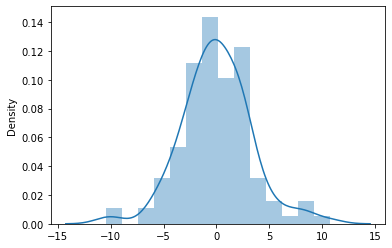

In [75]:
sns.distplot(residuals)

In [76]:
residuals.skew()

0.12384050948028269

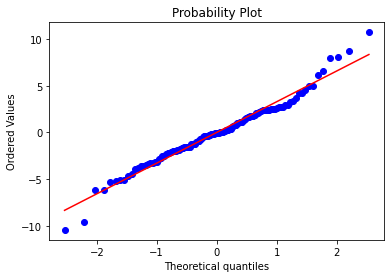

In [77]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [78]:
#since probability of jb is less than significance level ,we will reject ho to conclude that residuals are not normal

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [80]:

x = df2.drop('Expected',axis=1)
y = df2['Expected']
x['GDP_STATUS'] = x['GDP']*x['Status_Developing']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.14e-36
Time:                        16:04:55   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.5466      3.925     15.935      0.000      54.765      70.328
Adult_Mortality      -0.0228      0.004     -5.680      0.000      -0.031      -0.015
Infant_Deaths         0.0564      0.036      1.547      0.125      -0.016       0.129
Hepatitis             0.0715      0.032      2.259      0.026       0.009       0.134
Measles           -5.287e-05   6.03e-05     -0.877      0.382      -0.000    6.66e-05
BMI                  -0.0291      0.022     -1.306      0.194      -0.073       0.015
Underfive_Deaths     -0.0401      0.027     -1.497      0.137      -0.093       0.013
Polio                -0.0056      0.022     -0.258      0.797      -0.049       0.037
Diphtheria           -0.0446      0.040     -1.124      0.264      -0.123       0.034
HIV                  -1.0748      0.265     -4.054      0.000      -1.600      -0.549
GDP               -7.939e-06    4.6e-05     -0.173      0.863   -9.91e-05    8.32e-05
Population        -1.612e-08   8.58e-09     -1.878      0.063   -3.31e-08    8.96e-10
Malnourished10_19    -0.4757      0.297     -1.604      0.112      -1.064       0.112
Malnourished5_9       0.2995      0.280      1.071      0.287      -0.255       0.854
Income_Index         15.9884      6.392      2.501      0.014       3.315      28.662
Schooling             0.4188      0.343      1.220      0.225      -0.262       1.099
Status_Developing    -3.8250      1.489     -2.569      0.012      -6.777      -0.873
GDP_STATUS            0.0001    6.8e-05      1.902      0.060    -5.5e-06       0.000
==============================================================================
Omnibus:                        4.411   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.490
Skew:                           0.109   Prob(JB):                       0.0642
Kurtosis:                       4.008   Cond. No.                     9.48e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#new variable is insignificant

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
x = df2.drop('Expected',axis=1)
y = df2['Expected']
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   4.84e-108
Time:                        16:10:58   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Adult_Mortality      -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths        -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis             0.0305      0.058      0.523      0.602      -0.085       0.146
Measles              -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths      0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                 0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria            0.0388      0.073      0.535      0.593      -0.105       0.183
HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP               -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population        -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19    -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9       1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index         43.2384     11.241      3.846      0.000      20.956      65.520
Schooling             2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing     7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#predicted value will be zero when all variables are zero

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [85]:
df = pd.read_csv('LungCapdata.csv')
df.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     654 non-null    int64  
 1   Height  654 non-null    float64
 2   Gender  654 non-null    int64  
 3   Smoke   654 non-null    int64  
 4   FEV     654 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 25.7 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

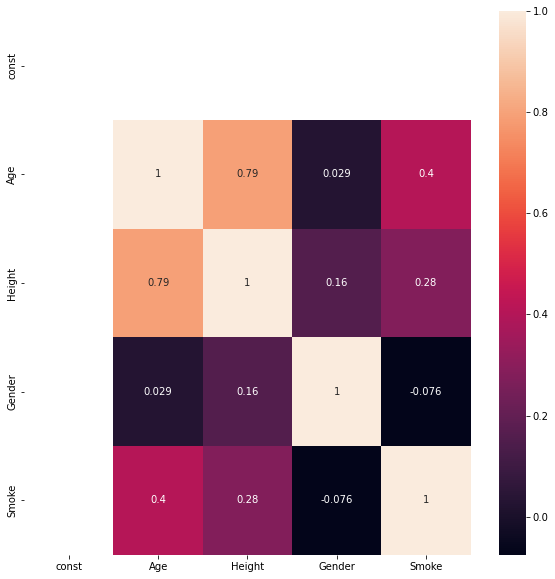

In [89]:
y = df['FEV']
x = df.drop('FEV',axis=1)

xc = sm.add_constant(x)

plt.figure(figsize=(10,10))
sns.heatmap(xc.corr(),annot=True)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif =[vif(xc.values,i)for i in range(xc.shape[1])]
pd.DataFrame(vif,index=xc.columns,columns=['vif'])

,vif
const,191.122030
Age,3.019010
Height,2.829728
Gender,1.060228
Smoke,1.209564


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
#considering correlation analysis, there is indication of some collinearity between age and height. To remove multicollinearity 
#one of the these variable may be dropped

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
y = df['FEV']
x = df.drop('FEV',axis=1)

xc = sm.add_constant(x)


model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          9.10e-209
Time:                        16:29:52   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
y = df['FEV']
x = df.drop(['FEV','Smoke'],axis=1)

xc = sm.add_constant(x)


model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     744.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          9.05e-210
Time:                        16:30:30   Log-Likelihood:                -346.99
No. Observations:                 654   AIC:                             702.0
Df Residuals:                     650   BIC:                             719.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4486      0.223    -19.952      0.000      -4.886      -4.011
Age            0.0614      0.009      6.766      0.000       0.044       0.079
Height         0.1046      0.005     21.986      0.000       0.095       0.114
Gender         0.1611      0.033      4.864      0.000       0.096       0.226
==============================================================================
Omnibus:                       23.453   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.454
Skew:                           0.189   Prob(JB):                     4.96e-11
Kurtosis:                       4.264   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
y_pred = model.predict(xc)

<AxesSubplot:ylabel='FEV'>

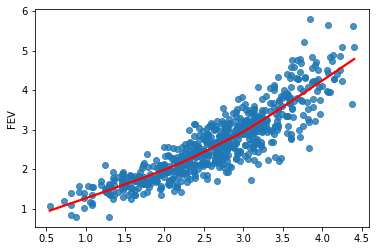

In [98]:
sns.regplot(x=y_pred,y=y,lowess=True,line_kws={'color':'red'})

In [99]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(0.9850614019332686, 0.5540074783420321)

In [100]:
#we accept ho 
#model is not appropriate

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
df = pd.read_csv('LungCapdata.csv')

y = df['FEV']
x = df.drop(['FEV','Smoke'],axis=1)
xc = sm.add_constant(x)

model=sm.OLS(y,xc).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     744.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          9.05e-210
Time:                        16:41:33   Log-Likelihood:                -346.99
No. Observations:                 654   AIC:                             702.0
Df Residuals:                     650   BIC:                             719.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4486      0.223    -19.952      0.000      -4.886      -4.011
Age            0.0614      0.009      6.766      0.000       0.044       0.079
Height         0.1046      0.005     21.986      0.000       0.095       0.114
Gender         0.1611      0.033      4.864      0.000       0.096       0.226
==============================================================================
Omnibus:                       23.453   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.454
Skew:                           0.189   Prob(JB):                     4.96e-11
Kurtosis:                       4.264   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

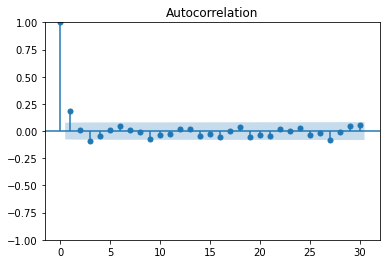

In [107]:
import statsmodels.tsa.api as smt

residuals = model.resid
smt.graphics.plot_acf(residuals,lags=30)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [108]:
y = df['FEV']
x = df.drop('FEV',axis=1)

xc = sm.add_constant(x)


model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          9.10e-209
Time:                        16:43:47   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#since prob(jb) is less than significance level,ho is rejected to conclude that residuals are not normally distributed

In [ ]:
#do qq plot
#residuals distplot


## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
y = df['FEV']
x = df.drop(['FEV','Smoke'],axis=1)
xc=sm.add_constant(x)

model = sm.OLS(y,xc).fit()
y_pred = model.predict(xc)
mse = np.sum((y-y_pred)**2)/len(y)
rmse = np.sqrt(mse)

print('mse',mse,'rmse',rmse)

mse 0.16918647070243514 rmse 0.41132283027135164


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
mae = np.sum(np.abs(y-y_pred))/len(y)
print(mae)

mape = np.sum(np.abs(y-y_pred)/y)/len(y)
print(mape)

0.3130935706513789
0.12552293994332683


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
from sklearn.model_selection import train_test_split

In [120]:
y = df['FEV']
x = df.drop('FEV',axis=1)
xc = sm.add_constant(xc)

xtrain,xtest,ytrain,ytest=train_test_split(xc,y,test_size=0.3,random_state=42)

model=sm.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     482.8
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.17e-140
Time:                        17:02:16   Log-Likelihood:                -250.54
No. Observations:                 457   AIC:                             509.1
Df Residuals:                     453   BIC:                             525.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4130      0.275    -16.060      0.000      -4.953      -3.873
Age            0.0616      0.012      5.236      0.000       0.038       0.085
Height         0.1037      0.006     17.466      0.000       0.092       0.115
Gender         0.1434      0.040      3.568      0.000       0.064       0.222
==============================================================================
Omnibus:                       11.521   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.418
Skew:                           0.159   Prob(JB):                     0.000100
Kurtosis:                       3.931   Cond. No.                         870.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
from sklearn import metrics
y_test_pred = model.predict(xtest)
r2_test=metrics.r2_score(ytest,y_test_pred)
r2_test

0.797864074534001

In [125]:
#r2 on train data is 0.77 and r2 on test data is 0.76.since the values are very close,there is no evidence of overfitting.